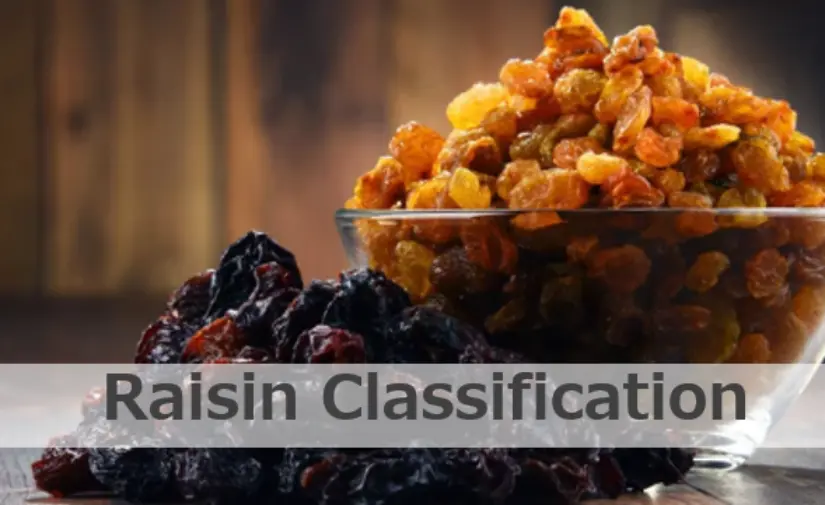

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [301]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)  
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)  
pd.options.display.float_format = '{:.3f}'.format

## Exploratory Data Analysis and Visualization

In [302]:
df0 = pd.read_excel('Raisin_Dataset.xlsx')
df = df0.copy()
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen


In [303]:
df.shape

(900, 8)

In [304]:
df.Class.value_counts(normalize=True) # The target variable is equally distributed

Class
Kecimen   0.500
Besni     0.500
Name: proportion, dtype: float64

In [305]:
df.info() # No Null values and proper datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [306]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [307]:
df[df.duplicated()] # There is no duplicates

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class


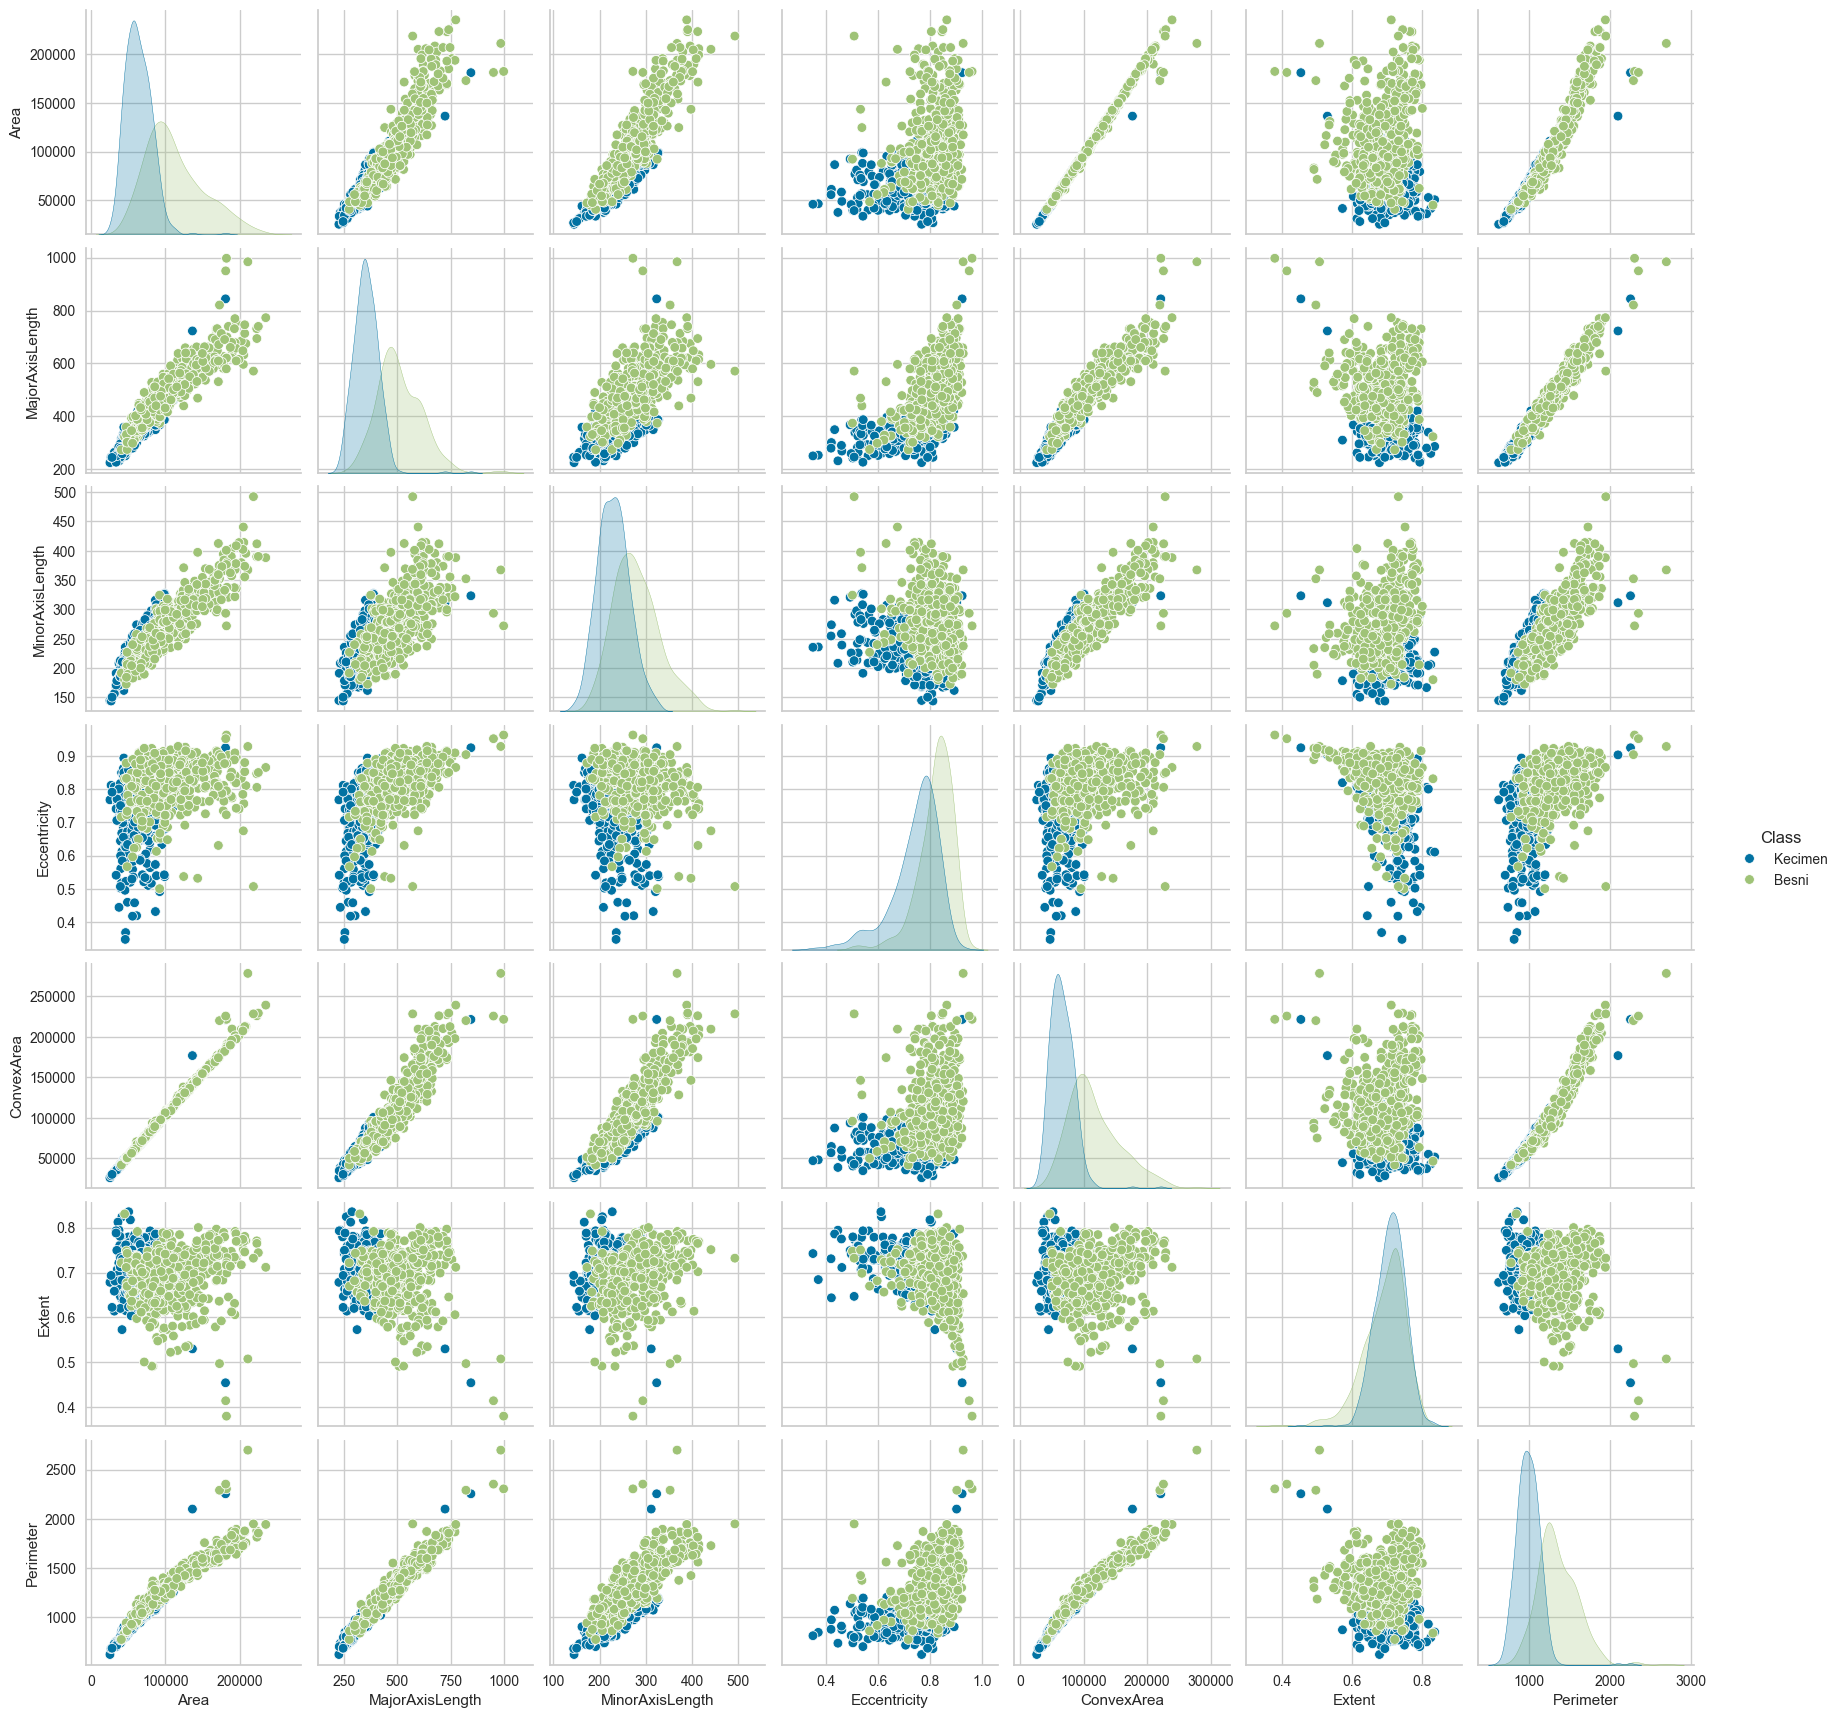

In [308]:
sns.pairplot(df, hue='Class');

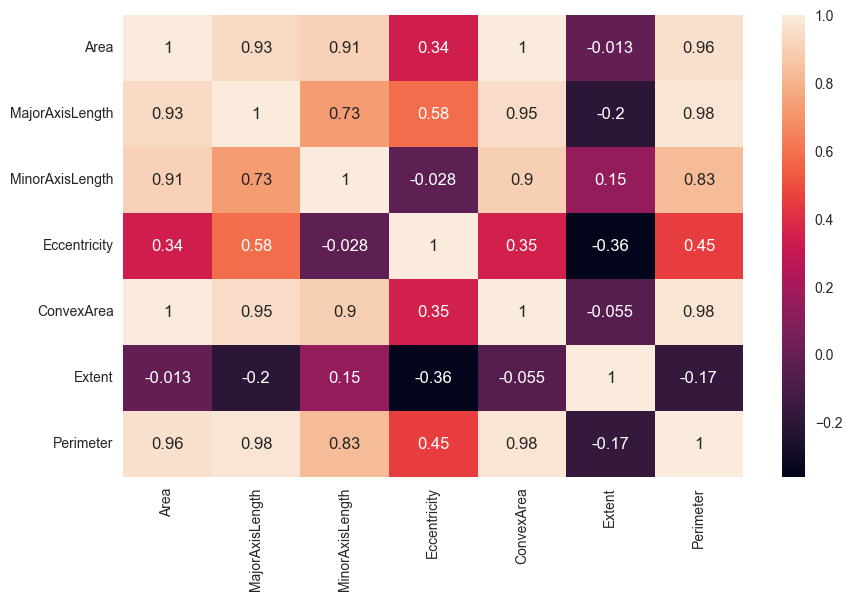

In [309]:
df_numeric = df.corr(numeric_only=True)
sns.heatmap(df_numeric, annot = True);

In [310]:
# Need tobe carefull, there is sign for multicollinearity
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any() 

True

In [311]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

True

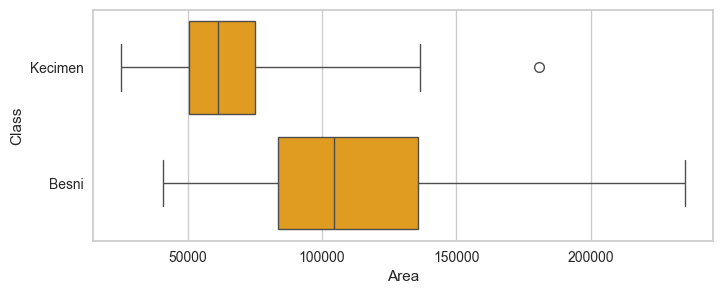

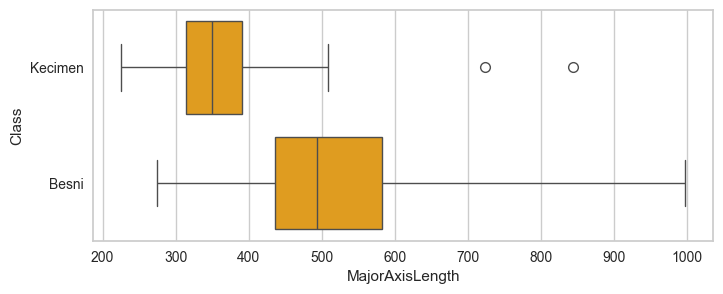

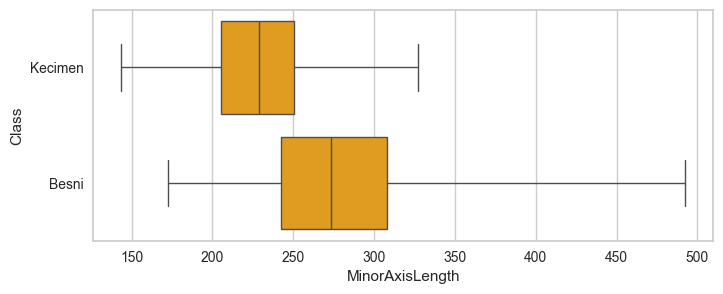

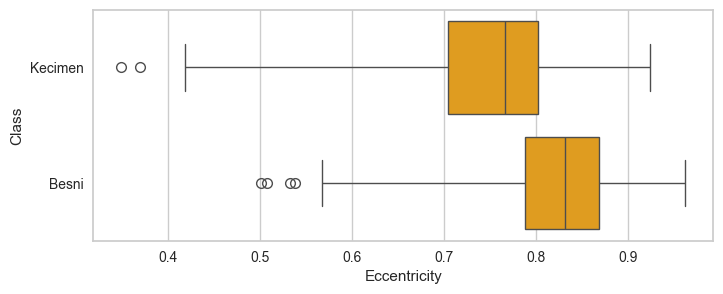

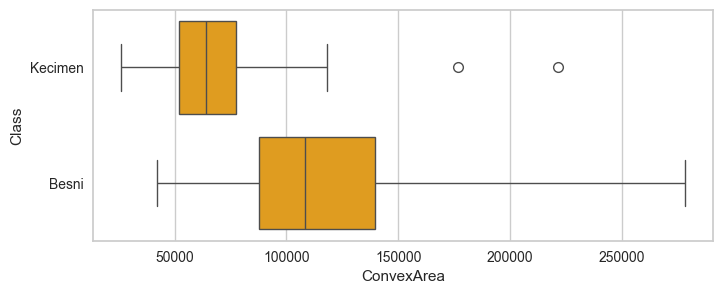

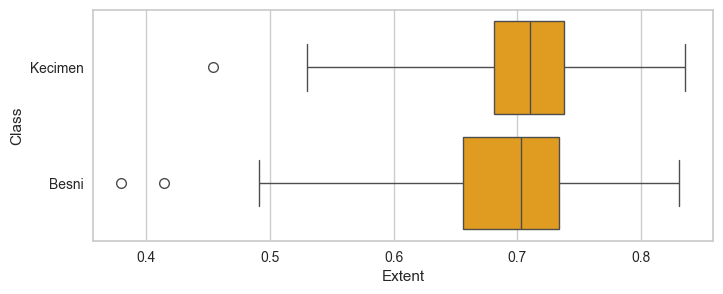

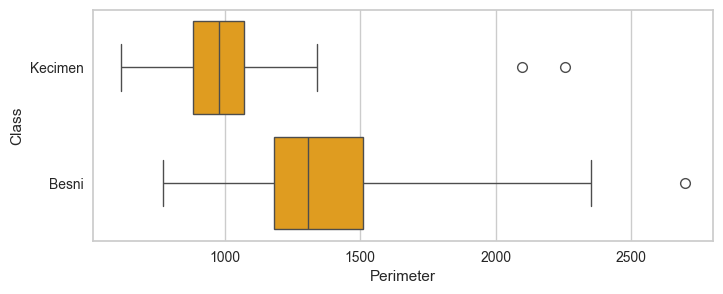

In [312]:
for col in df.columns:
    if col != 'Class':
        plt.figure(figsize=(8,3))
        sns.boxplot(x=str(col), y="Class", data=df, whis=3,color='orange')
        plt.show()   

## Train | Test Split and Scaling

In [313]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [314]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [316]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [317]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [318]:
log_model.coef_

array([[-0.20275466, -0.62289201,  0.64728258, -0.07828857, -0.50430195,
         0.25617524, -2.50406748]])

In [319]:
log_model.intercept_

array([-0.31312339])

In [320]:
y_pred = log_model.predict(X_test_scaled)
y_pred[:15]

array(['Besni', 'Besni', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen'], dtype=object)

In [321]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[9.63792644e-01, 3.62073563e-02],
       [9.44677675e-01, 5.53223248e-02],
       [2.41413851e-01, 7.58586149e-01],
       [9.99999964e-01, 3.55758741e-08],
       [9.58455138e-01, 4.15448621e-02],
       [2.30479836e-01, 7.69520164e-01],
       [2.16017963e-01, 7.83982037e-01],
       [1.09484483e-01, 8.90515517e-01],
       [2.48989819e-01, 7.51010181e-01],
       [9.90447858e-01, 9.55214167e-03],
       [8.24337811e-01, 1.75662189e-01],
       [4.75049290e-02, 9.52495071e-01],
       [9.81282110e-01, 1.87178902e-02],
       [4.83153993e-02, 9.51684601e-01],
       [1.20827242e-01, 8.79172758e-01],
       [9.60860911e-01, 3.91390888e-02],
       [8.39413290e-01, 1.60586710e-01],
       [9.93843736e-01, 6.15626379e-03],
       [4.80793195e-02, 9.51920681e-01],
       [4.39662185e-01, 5.60337815e-01],
       [8.84339450e-01, 1.15660550e-01],
       [9.92945863e-01, 7.05413726e-03],
       [9.93491807e-01, 6.50819322e-03],
       [4.32464903e-01, 5.67535097e-01],
       [8.909732

In [322]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data["pred_proba"] = y_pred_proba[:,1]
test_data["pred"] = y_pred
test_data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
505,102569,515.395,259.194,0.864,106888,0.573,1331.797,Besni,0.036,Besni
815,117354,520.327,289.662,0.831,121057,0.712,1374.171,Besni,0.055,Besni
73,68520,373.236,237.042,0.772,70759,0.713,1049.093,Kecimen,0.759,Kecimen
836,181126,949.663,293.387,0.951,225592,0.414,2352.029,Besni,0.000,Besni
504,88290,514.436,221.445,0.903,92317,0.555,1277.388,Besni,0.042,Besni


## Model Performance

In [323]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [324]:
confusion_matrix(y_test, y_pred)

array([[90, 18],
       [ 8, 64]], dtype=int64)

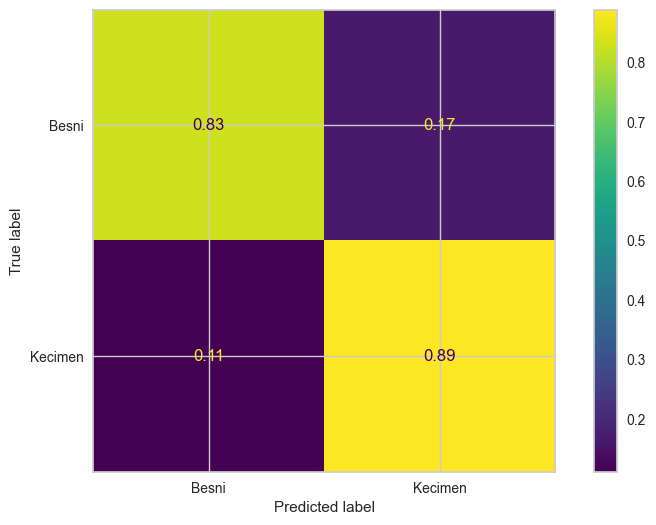

In [325]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test, normalize='true');

In [326]:
print(classification_report(y_test, y_pred)) # The model classified correctly 86% of the target variables. 
                                             # Since this is binary classification, we need to check accuracy score

              precision    recall  f1-score   support

       Besni       0.92      0.83      0.87       108
     Kecimen       0.78      0.89      0.83        72

    accuracy                           0.86       180
   macro avg       0.85      0.86      0.85       180
weighted avg       0.86      0.86      0.86       180



In [327]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred)) # The model has 88% accuray for the train set  which signs needing the regularization

              precision    recall  f1-score   support

       Besni       0.89      0.85      0.87       342
     Kecimen       0.87      0.90      0.89       378

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720



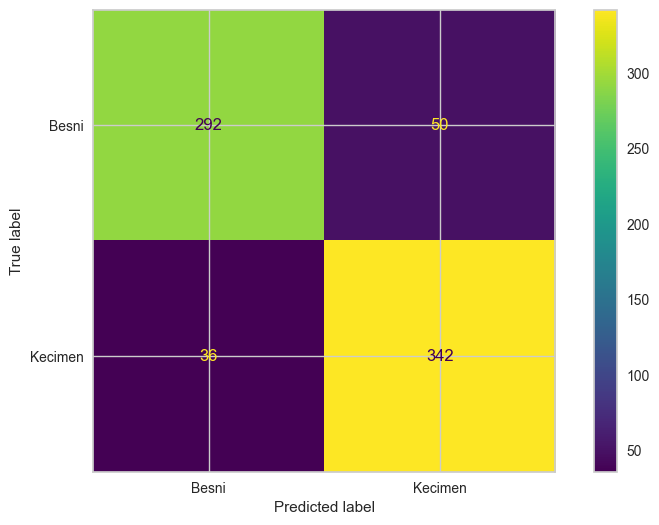

In [328]:
ConfusionMatrixDisplay.from_estimator(log_model, X_train_scaled, y_train);

### Feature Importance

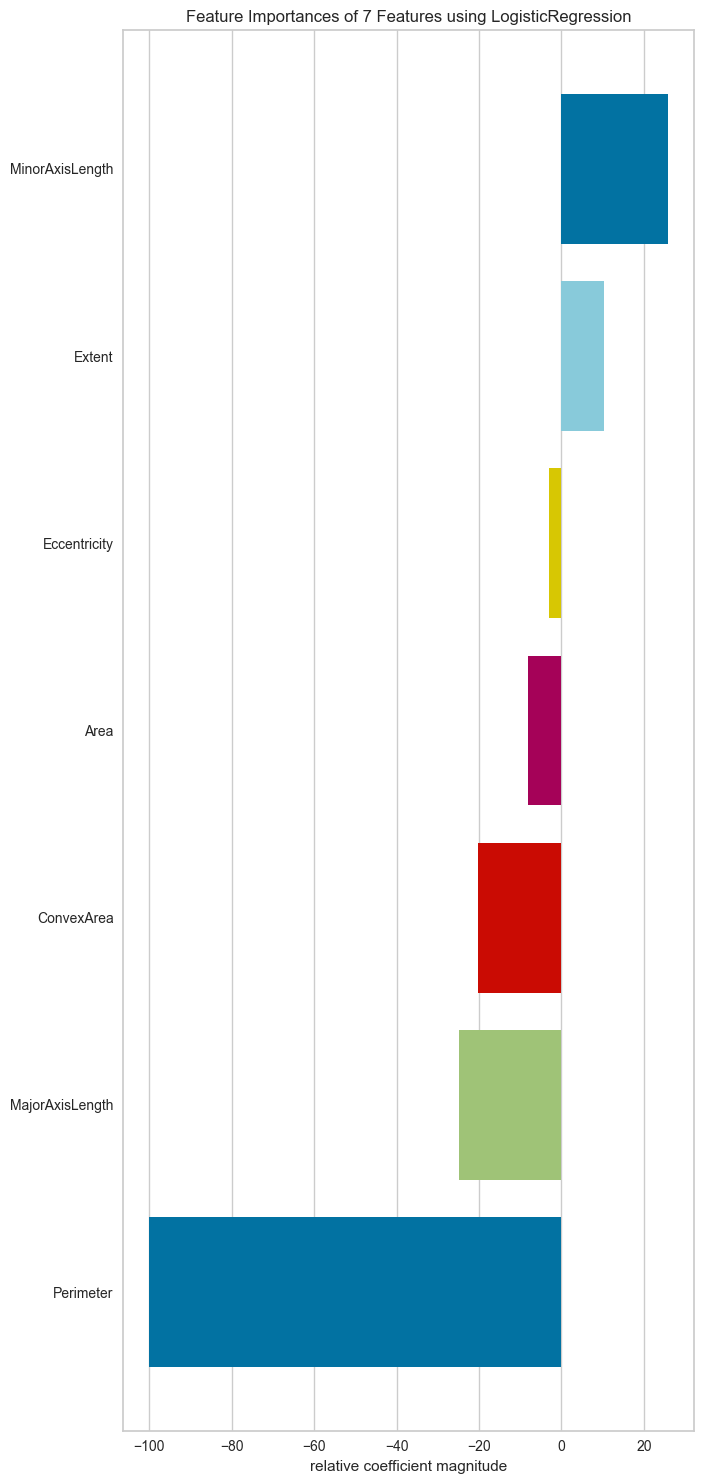

<Axes: title={'center': 'Feature Importances of 7 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [329]:
# There are 7 features, however, since we checked the correlation and signs for the multicollinearity, some features needs to be eliminated.
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
viz = FeatureImportances(log_model, labels=X_train.columns)
visualizer = RadViz(size=(720, 1500))
viz.fit(X_train_scaled, y_train)
viz.show()

### Cross Validate

In [330]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import get_scorer_names

In [331]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv=10)
df.scores = pd.DataFrame(scores, index = range(1, 11))
df.scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.016,0.015,0.875,NaN,NaN,NaN
2,0.015,0.011,0.889,NaN,NaN,NaN
3,0.014,0.020,0.792,NaN,NaN,NaN
4,0.021,0.015,0.903,NaN,NaN,NaN
5,0.016,0.020,0.903,NaN,NaN,NaN
6,0.014,0.020,0.889,NaN,NaN,NaN
7,0.008,0.008,0.903,NaN,NaN,NaN
8,0.009,0.000,0.889,NaN,NaN,NaN
9,0.000,0.016,0.806,NaN,NaN,NaN
10,0.000,0.016,0.889,NaN,NaN,NaN


In [332]:
df.scores.mean()[2:]

test_accuracy    0.874
test_precision     NaN
test_recall        NaN
test_f1            NaN
dtype: float64

In [333]:
print("Test set")
print(classification_report(y_test, y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))

Test set
              precision    recall  f1-score   support

       Besni       0.92      0.83      0.87       108
     Kecimen       0.78      0.89      0.83        72

    accuracy                           0.86       180
   macro avg       0.85      0.86      0.85       180
weighted avg       0.86      0.86      0.86       180

Train Set

              precision    recall  f1-score   support

       Besni       0.89      0.85      0.87       342
     Kecimen       0.87      0.90      0.89       378

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720



### GridSearchCV

In [334]:
from sklearn.model_selection import GridSearchCV

In [335]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 10) #katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight = ["balanced", None]
solver = ["liblinear", "sag", "saga"]


param_grid = {"penalty": penalty,
             "C": C,
             "class_weight":class_weight,
             "solver": solver}

grid_model = GridSearchCV(estimator = model, 
                          param_grid = param_grid, 
                          cv = 10, scoring = "recall", 
                          n_jobs = -1)

In [336]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='recall')

In [337]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [338]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [339]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[90 18]
 [ 9 63]]
              precision    recall  f1-score   support

       Besni       0.91      0.83      0.87       108
     Kecimen       0.78      0.88      0.82        72

    accuracy                           0.85       180
   macro avg       0.84      0.85      0.85       180
weighted avg       0.86      0.85      0.85       180


Train_Set
[[284  58]
 [ 36 342]]
              precision    recall  f1-score   support

       Besni       0.89      0.83      0.86       342
     Kecimen       0.85      0.90      0.88       378

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

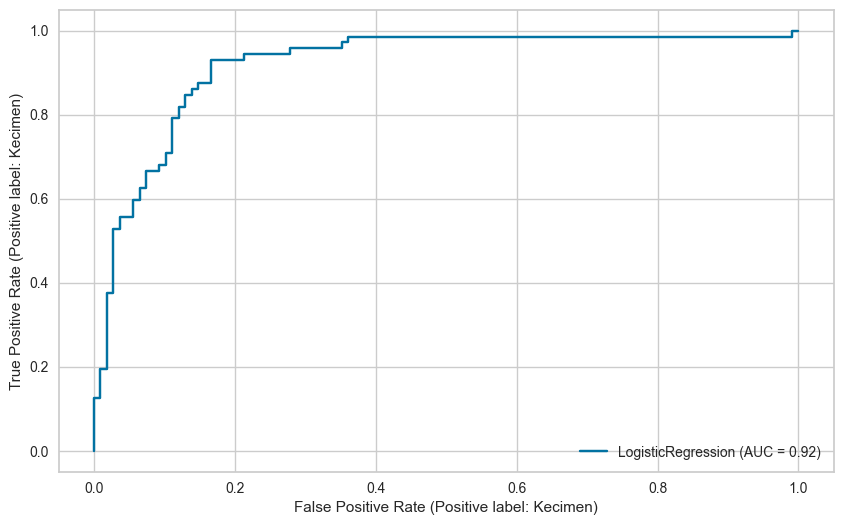

In [340]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve
RocCurveDisplay.from_estimator(log_model, X_test_scaled, y_test);

In [341]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9194958847736625

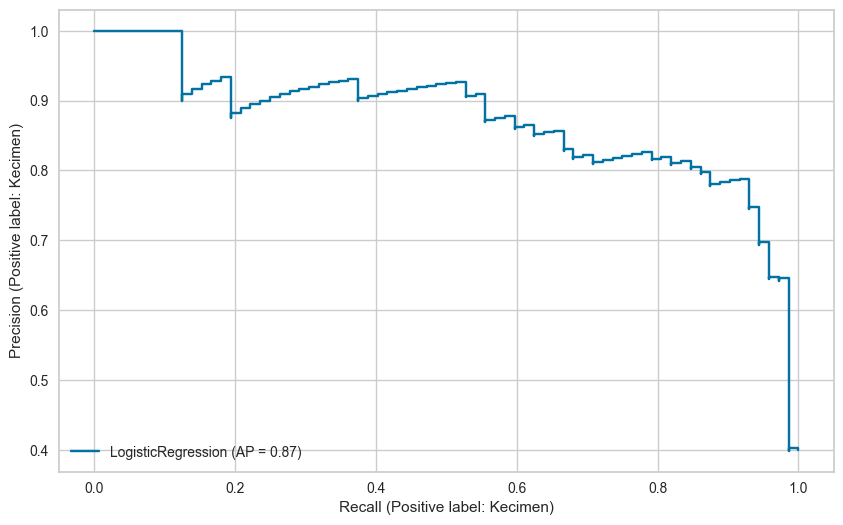

In [342]:
PrecisionRecallDisplay.from_estimator(log_model, X_test_scaled, y_test);

# Conclusion 

In [343]:
# It seems there are some features affect mostly, with these features we will rerun our model.
df_final = df0[['MajorAxisLength', 'MinorAxisLength', 'Perimeter', 'Class']]

In [344]:
X = df_final.drop(['Class'], axis = 1)
y = df_final['Class']

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    stratify=y, 
                                                    random_state = 42)

In [346]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [347]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [348]:
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [349]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(20)

,MajorAxisLength,MinorAxisLength,Perimeter,Class,pred,pred_proba
335,340.405,204.336,928.274,Kecimen,Kecimen,0.897
837,580.438,318.181,1512.658,Besni,Besni,0.011
619,541.948,260.084,1369.202,Besni,Besni,0.028
42,375.250,262.812,1095.283,Kecimen,Kecimen,0.723
217,376.662,221.655,1057.897,Kecimen,Kecimen,0.671
257,300.906,185.851,802.261,Kecimen,Kecimen,0.973
437,414.107,266.908,1146.164,Kecimen,Kecimen,0.531
324,365.319,230.526,989.581,Kecimen,Kecimen,0.843
638,477.909,273.404,1266.657,Besni,Besni,0.161
584,484.166,269.146,1307.683,Besni,Besni,0.099


In [350]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[75 15]
 [ 4 86]]
              precision    recall  f1-score   support

       Besni       0.95      0.83      0.89        90
     Kecimen       0.85      0.96      0.90        90

    accuracy                           0.89       180
   macro avg       0.90      0.89      0.89       180
weighted avg       0.90      0.89      0.89       180


Train_Set
[[305  55]
 [ 46 314]]
              precision    recall  f1-score   support

       Besni       0.87      0.85      0.86       360
     Kecimen       0.85      0.87      0.86       360

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



In [351]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["precision", 
                                                                   "recall",
                                                                   "f1", 
                                                                   "accuracy"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))

In [352]:
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.010,0.015,NaN,NaN,NaN,0.736
2,0.009,0.009,NaN,NaN,NaN,0.833
3,0.015,0.010,NaN,NaN,NaN,0.903
4,0.014,0.012,NaN,NaN,NaN,0.861
5,0.011,0.012,NaN,NaN,NaN,0.778
6,0.010,0.019,NaN,NaN,NaN,0.917
7,0.016,0.024,NaN,NaN,NaN,0.833
8,0.010,0.013,NaN,NaN,NaN,0.875
9,0.011,0.012,NaN,NaN,NaN,0.931
10,0.008,0.013,NaN,NaN,NaN,0.903


In [353]:
df_scores.mean()[2:]

test_precision     NaN
test_recall        NaN
test_f1            NaN
test_accuracy    0.857
dtype: float64

In [364]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 10)
class_weight = ["balanced", None]
solver = [ "liblinear", "sag", "saga"]


param_grid = {"penalty": penalty,
             "C": C,
             "class_weight":class_weight,
             "solver": solver}

grid_model = GridSearchCV(estimator = model, 
                          param_grid = param_grid, 
                          cv = 10, scoring = "recall", 
                          n_jobs = -1)

In [355]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='recall')

In [356]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [357]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[71 19]
 [ 4 86]]
              precision    recall  f1-score   support

       Besni       0.95      0.79      0.86        90
     Kecimen       0.82      0.96      0.88        90

    accuracy                           0.87       180
   macro avg       0.88      0.87      0.87       180
weighted avg       0.88      0.87      0.87       180


Train_Set
[[295  65]
 [ 38 322]]
              precision    recall  f1-score   support

       Besni       0.89      0.82      0.85       360
     Kecimen       0.83      0.89      0.86       360

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



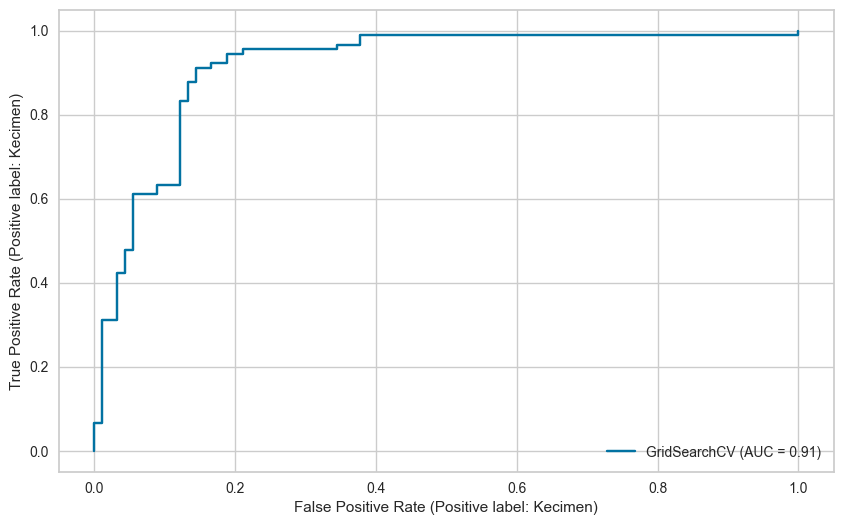

In [362]:
RocCurveDisplay.from_estimator(grid_model, X_test_scaled, y_test);

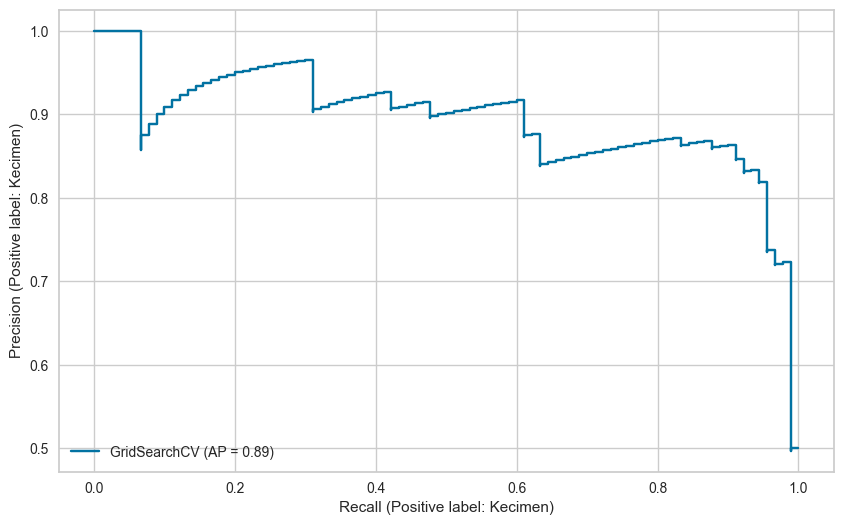

In [363]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test_scaled, y_test);

In [360]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:, 1])

0.9277083333333334

In [ ]:
# As a result our model classifies with accuracy of 0.87 and after gridsearch cv although accuracy decrease a little,
# the performance of model with new data will generate consistent results. 
# LazyClassifier Shows one of the best model is LogisticRegression with raisin data

In [366]:
from lazypredict.Supervised import LazyClassifier


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:02<00:00, 12.25it/s]

[LightGBM] [Info] Number of positive: 360, number of negative: 360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 